In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

RANDOM_STATE = 42


In [47]:
sns.set_theme(
    style="whitegrid",
    palette="viridis",
    font_scale=1.1
)


In [27]:
from pathlib import Path

DATA_PATH = Path("..") / "data" / "raw" / "salaries.csv"
df = pd.read_csv(DATA_PATH)

df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [28]:
df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,151445.0,NaN,NaN,NaN,2024.435313,0.671842,2020.0,2024.0,2025.0,2025.0,2025.0
experience_level,151445,4,SE,87491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,151445,4,FT,150541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,151445,422,Data Scientist,18751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,151445.0,NaN,NaN,NaN,162837.963135,208012.396413,14000.0,106000.0,147000.0,199000.0,30400000.0
salary_currency,151445,26,USD,143173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,151445.0,NaN,NaN,NaN,157527.458411,74150.772377,15000.0,105800.0,146100.0,198000.0,800000.0
employee_residence,151445,104,US,135506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,151445.0,NaN,NaN,NaN,20.938625,40.620393,0.0,0.0,0.0,0.0,100.0
company_location,151445,97,US,135569,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print("Shape:", df.shape)
display(df.sample(5, random_state=RANDOM_STATE))
df.info()
df.describe(include="all").T


Shape: (151445, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
6098,2025,MI,FT,Data Analyst,80000,USD,80000,US,0,US,M
11157,2025,MI,FT,Engineer,213000,USD,213000,US,0,US,M
35020,2025,MI,FT,Engineer,155000,USD,155000,US,100,US,M
2876,2025,SE,FT,Solutions Architect,250000,USD,250000,US,0,US,M
133713,2024,SE,FT,Business Intelligence Analyst,104550,USD,104550,US,100,US,M


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,151445.0,NaN,NaN,NaN,2024.435313,0.671842,2020.0,2024.0,2025.0,2025.0,2025.0
experience_level,151445,4,SE,87491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,151445,4,FT,150541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,151445,422,Data Scientist,18751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,151445.0,NaN,NaN,NaN,162837.963135,208012.396413,14000.0,106000.0,147000.0,199000.0,30400000.0
salary_currency,151445,26,USD,143173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,151445.0,NaN,NaN,NaN,157527.458411,74150.772377,15000.0,105800.0,146100.0,198000.0,800000.0
employee_residence,151445,104,US,135506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,151445.0,NaN,NaN,NaN,20.938625,40.620393,0.0,0.0,0.0,0.0,100.0
company_location,151445,97,US,135569,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)

df.columns


Index(['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [11]:
TARGET = "salary_in_usd"

df = df.dropna(subset=[TARGET])

df = df.drop(columns=["salary", "salary_currency"], errors="ignore")

print("Shape after basic cleanup:", df.shape)


Shape after basic cleanup: (151445, 9)


In [12]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


Series([], dtype: int64)

In [13]:
duplicates = df.duplicated().sum()
duplicates


np.int64(79555)

In [14]:
df = df.drop_duplicates()


In [15]:
experience_map = {
    "EN": 0,
    "MI": 1,
    "SE": 2,
    "EX": 3
}

df["experience_level_encoded"] = df["experience_level"].map(experience_map)


In [16]:
lower, upper = df[TARGET].quantile([0.01, 0.99])
df[TARGET] = df[TARGET].clip(lower, upper)


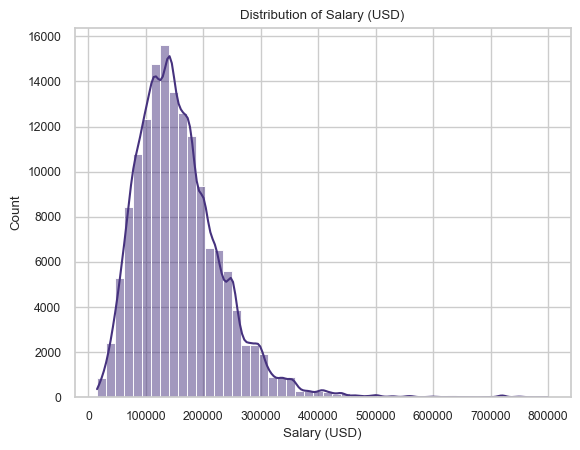

In [57]:
sns.set_theme(
    style="whitegrid",
    palette="viridis",
    font_scale=0.8
)

plt.figure()
sns.histplot(df[TARGET], bins=50, kde=True)
plt.title("Distribution of Salary (USD)")
plt.xlabel("Salary (USD)")
plt.ylabel("Count")
plt.show()


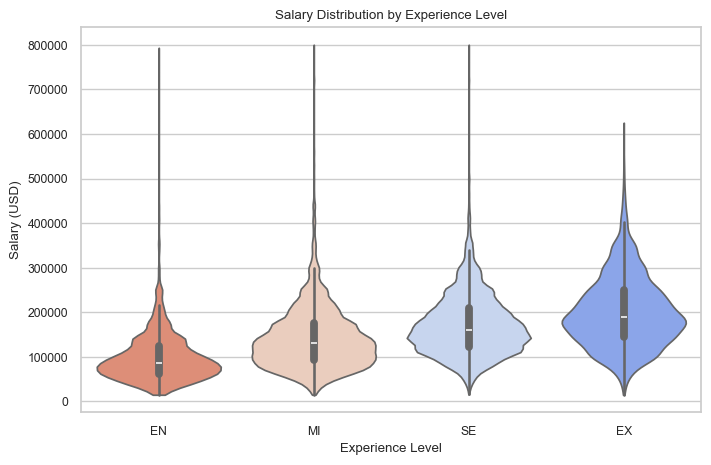

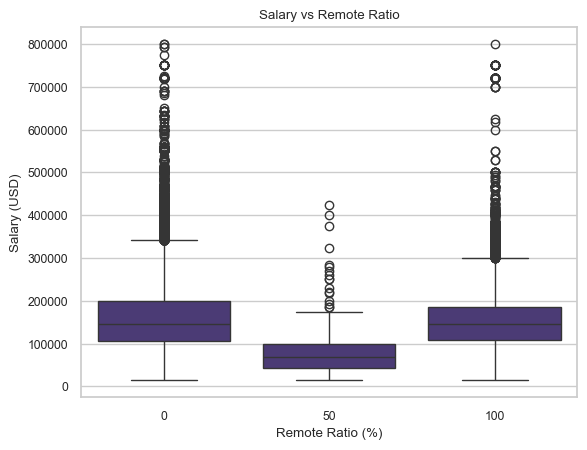

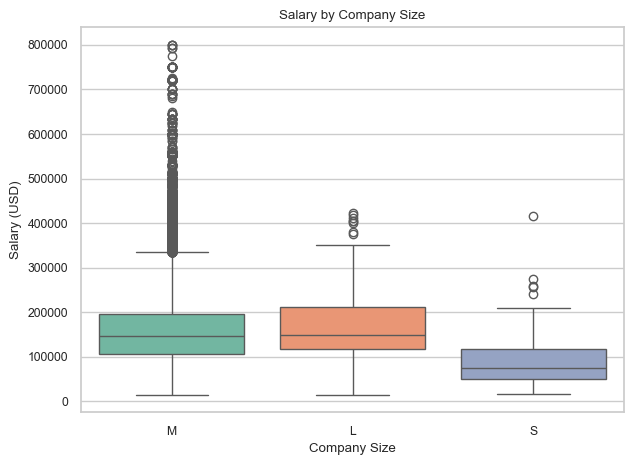

In [79]:
plt.figure(figsize=(8, 5))
sns.violinplot(
    x="experience_level",
    y="salary_in_usd",
    hue="experience_level",
    data=df,
    order=["EN", "MI", "SE", "EX"],
    palette="coolwarm",
    legend=False,
    cut=0
)
plt.title("Salary Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.show()

plt.figure()
sns.boxplot(
    x="remote_ratio",
    y=TARGET,
    data=df
)
plt.title("Salary vs Remote Ratio")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Salary (USD)")
plt.show()

plt.figure(figsize=(7, 5))
sns.boxplot(
    x="company_size",
    y="salary_in_usd",
    hue="company_size",
    data=df,
    palette="Set2",
    legend=False
)
plt.title("Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Salary (USD)")
plt.show()



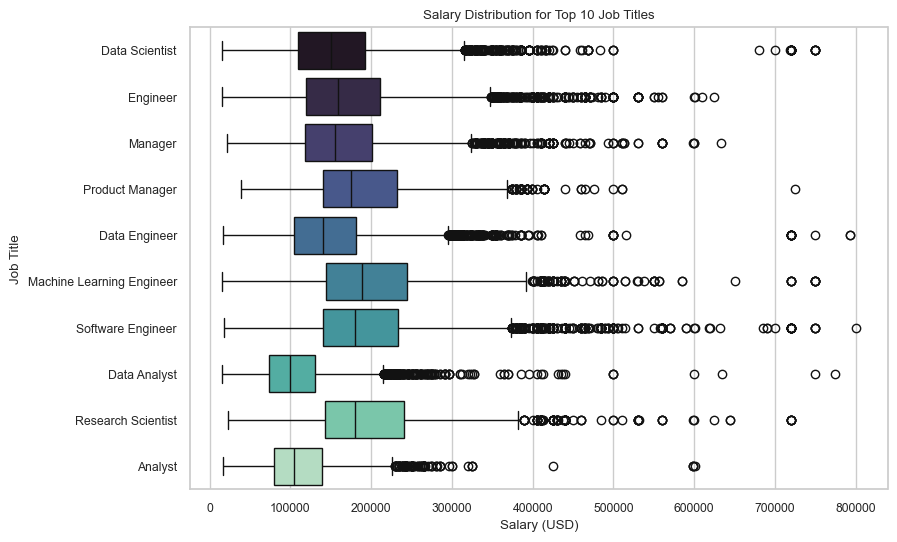

In [76]:
plt.figure(figsize=(9, 6))
sns.boxplot(
    y="job_title",
    x="salary_in_usd",
    hue="job_title",
    data=df[df["job_title"].isin(top_titles)],
    palette="mako",
    legend=False
)
plt.title("Salary Distribution for Top 10 Job Titles")
plt.xlabel("Salary (USD)")
plt.ylabel("Job Title")
plt.show()

In [35]:
features = [
    "experience_level",
    "employment_type",
    "job_title",
    "company_size",
    "remote_ratio",
    "company_location"
]
df["log_salary"] = np.log(df["salary_in_usd"])

X = df[features]
y = df["log_salary"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)


In [33]:
categorical_features = X.select_dtypes(include="object").columns
numeric_features = X.select_dtypes(exclude="object").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression())
    ]
)


In [43]:
y_pred_log = model.predict(X_test)

y_pred = np.exp(y_pred_log)
y_test_actual = np.exp(y_test)

rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

rmse, mae, r2


(np.float64(63478.46122896172), 44788.04877625464, 0.2745918230660579)

In [45]:
# R² on log scale (model fit on training target)
r2_log = r2_score(y_test, y_pred_log)

# R² on dollar scale (more intuitive interpretation)
r2_usd = r2_score(y_test_actual, y_pred)

r2_log, r2_usd


(0.41743637672360223, 0.2745918230660579)

R² is reported on the dollar scale for interpretability, while log-scale modeling was used internally to stabilize variance and improve regression performance.

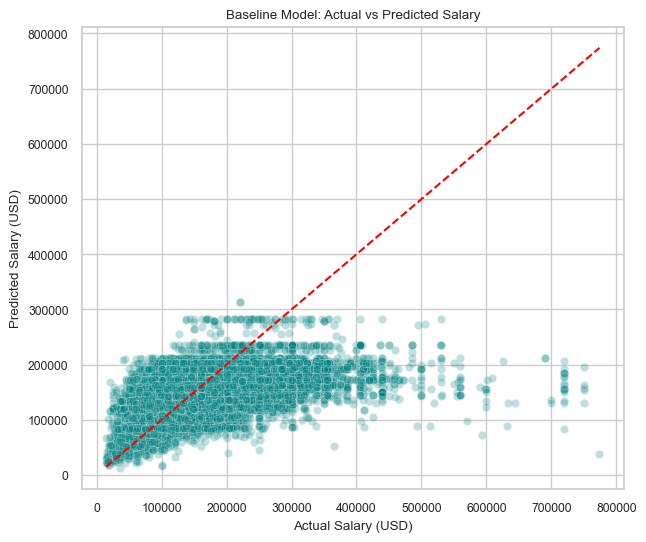

In [72]:
plt.figure(figsize=(7, 6))
sns.scatterplot(
    x=y_test_actual,
    y=y_pred,
    alpha=0.25,
    color="teal"
)

plt.plot(
    [y_test_actual.min(), y_test_actual.max()],
    [y_test_actual.min(), y_test_actual.max()],
    linestyle="--",
    color="red"
)

plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title("Baseline Model: Actual vs Predicted Salary")
plt.show()

## Baseline Model Interpretation

We trained a baseline Linear Regression model to predict annual salary using job title, experience level, company size, remote ratio, employment type, and company location. Because salary data is strongly right-skewed, the target variable was log-transformed prior to modeling to stabilize variance and improve linear regression performance. Model predictions were then exponentiated back to U.S. dollars for evaluation and interpretation.

The baseline model achieved a Mean Absolute Error (MAE) of approximately 44.8K USD, a Root Mean Squared Error (RMSE) of approximately 63.5K USD, and an R² score of approximately 0.28. These results indicate that the model captures some meaningful structure in the AI/ML job market but leaves a substantial portion of salary variability unexplained.

This outcome is expected for a baseline model, as compensation is influenced by additional factors not captured in the dataset, such as specific technical skill depth, company tier, individual negotiation, and nuanced differences in role responsibilities. Future modeling efforts may improve performance by incorporating non-linear models, advanced feature engineering, and NLP-based skill extraction from job descriptions. Enhanced visual styling and distribution-aware plots (e.g., violin plots) were used to better capture salary variability across categorical features while maintaining interpretability.



### Why a Linear Model Was Used

A linear regression model was selected as a baseline because it provides a transparent and interpretable starting point for understanding salary dynamics in the AI/ML job market. Linear models allow direct examination of how features such as experience level, job title, company size, and remote work relate to compensation, making them well-suited for exploratory analysis.

While non-linear models (e.g., Random Forests or Gradient Boosting) may achieve higher predictive accuracy—particularly for extreme salaries—their added complexity is better justified after establishing a baseline and identifying key limitations in simpler models. The observed underprediction of very high salaries in this analysis highlights these limitations and motivates the use of more advanced models in future work.
